> # NAMA  : MUHAMMAD HAYYU RAHMAN
# NIM      : 09011381722105
# KELAS : SK 5A

# PENERAPAN METODE FUZZY MAMDANI UNTUK MEMPREDIKSI JUMLAH PRODUKSI KARET

Persaingan pasar dalam dunia industri sangat penting dibutuhkan oleh sebuah perusahaan khususnya PTP Nusantara XIV (Persero) Kebun Awaya/Teluk Elpaputih yang bergerak dalam bidang pengolahan karet. Produksi karet dalam waktu yang tepat dan dalam jumlah yang tepat merupakan sesuatu yang diinginkan oleh perusahaan tersebut. Namun, dalam menentukan jumlah produksi karet 
di waktu yang akan datang tidaklah mudah. Banyaknya faktor yang menjadi kendala dalam kebijakan untuk dapat menentukan jumlah karet yang akan diproduksi. Sehingga, sasaran produksi tidak tercapai karena usia tanaman dan populasi yang tidak standar berpengaruh terhadap produktivitas tanaman di kebun Awaya/Teluk Elpaputih. Sasaran tersebut berpengaruh terhadap faktor-faktor 
antara lain permintaan maksimum, permintaan minimum, persediaan maksimum, persediaan minimum, produksi maksimum, dan produksi minimum

Untuk mendapatkan 
output diperlukan 4 tahapan: 
- Pembentukan himpunan fuzzy
- Aplikasi fungsi aplikasi
- Komposisi aturan
- Penegasan


# I. METODE FUZZY YANG DIGUNAKAN

Metode fuzzy yang digunakan adalah Mamdani. Langkah-langkah dalam metode mamdani, antara lain:  
1. Pembentukan Himpunan Fuzzy
2. membentuk aturan fuzzy
3. inferensi model fuzzy
4. Defuzifikasi

# II. PENYELESAIAN DENGAN PYTHON

- Import Library

In [28]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

## A. PEMBENTUKAN HIMPUNAN FUZZY

### 1. Variabel Input
Variabel input atau faktor yang menentukan besarnya jumlah produksi :
- jumlah produksi

In [29]:
permintaan = ctrl.Antecedent(np.arange(0,1400, 10),'permintaan')
x_permintaan = np.arange(0,1400, 10)

In [38]:
persediaan = ctrl.Antecedent(np.arange(0,774, 1),'persediaan')
x_persediaan = np.arange(0,774, 1)

### 2. Variabel output
Variabel output ini adalah jumlah permintaan :
- permintaan

In [45]:
permintaan['sedikit'] = fuzz.trapmf(permintaan.universe,[1,100, 100, 600,])
permintaan['sedang'] = fuzz.trimf(permintaan.universe,[400, 600, 1400])

C:\Users\FX505DY\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


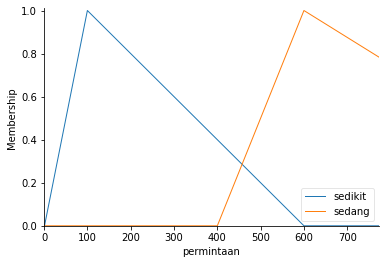

In [46]:
permintaan.view()

In [47]:
persediaan['sedikit'] = fuzz.trapmf(persediaan.universe,[0,1, 1, 49,])
persediaan['sedang'] = fuzz.trimf(persediaan.universe,[1, 6, 14])

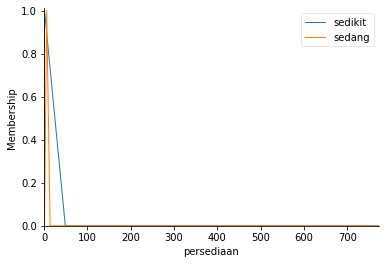

In [48]:
persediaan.view()

### 3. Nilai Linguistik

- 𝑆𝐸𝐷𝐴𝑁𝐺 = 

$$ SEDANG [z] =
\begin{cases}
       0 & ; x \leq 3360\\
    \frac{(x-3360)}{(5200-3360)} & ;{3360 \leq x \leq 5200} \\
     \frac{(7040-x)}{(7040-5200)} & ;{5200 \leq x \leq 7040}
    \end{cases}
$$

 
- SEDANG =
$$ \mu [5164] SEDANG =
\begin{cases}
    \frac{5164-3360}{5200-3360}=\frac{1804}{1840}=0,98
   \end{cases}
$$

diketahui : 
𝜇[𝑥] = 5164, a = 3360, b = 5200, c = 7040

### Sehingga diperoleh :

$$
\mu[5164]SEDANG = 0,98 \\
\mu[5164]RENDAH = 0,00 \\
\mu[5164]TINGGI = 0,00 \\
$$

Yang berarti bahwa permintaan karet tersebut dikatakan SEDANG dengan derajat keanggotaan = 0,98 
atau 98%. Untuk variabel persediaan didefenisikan pada tiga himpunan fuzzy, yaitu SEDIKIT, 
SEDANG, BANYAK. Setiap himpunan fuzzy memiliki interval fungsi keanggotaan. Berikut adalah 
gambar fungsi keanggotaan pada variabel persediaan 774 liter. Persediaan 774 liter termasuk 
kedalam himpunan fuzzy SEDIKIT dan SEDANG dengan derajat keanggotaan sesuai fungsi berikut :

$$
\mu [x]SEDIKIT =
\begin{cases}
    0 & ; x \leq 100  atau x \geq 991 \\
    \frac{x-100}{496-100} & ; 100 \leq x \leq 496 \\
    \frac{991-x}{991-496} & ; 496 \leq x \leq 991 \\
   \end{cases}
  $$
  
$$
\mu [x]SEDANG =
\begin{cases}
    0 & ; x \leq 600 atau x \leq 1400 \\
    \frac{x-600}{1000-600} & ; 600 \leq x \leq 1000 \\
    \frac{1400-x}{1400-1000} & ; 1000 \leq x \leq 1400
    \end{cases}
    $$

diketahui 𝜇[𝑥] = 774, a = 100, b = 496, c = 991

$$
\mu [774] SEDIKIT =
\begin{cases}
\frac{991-774}{991-496}
\frac{217}{495} = 0,438 = 0,44
\end{cases}
$$

𝜇[𝑥] = 774

diperoleh : 

$$
\mu[774]SEDANG = 0,44 \\
\mu[7744]SEDIKIT = 0,44 \\
\mu[5164]BANYAK = 0,00
$$

berarti persediaan karet dikatakan SEDANG dan SEDIKIT dengan derajat keanggotaan = 0,44 atau 44%

### APLIKASI FUNGSI IMPLIKASI
Fungsi implikasi yang digunakan dalam proses ini adalah fungsi MIN, yaitu dengan mengambil derajat 
keanggotaan minimum dari variabel input sebagai outputnya. Berdasarkan aturan-aturan yang sesuai 
dengan fungsi implikasi yaitu ada 9 aturan tetapi yang digunakan yaitu dua aturan yaitu [R4] dan [R5] 
sebagai berikut :



[R4] : Jika Permintaan adalah SEDANG dan Persediaan adalah SEDIKIT Maka produksi adalah 
SEDANG. 

[R5] : Jika Permintaan adalah SEDANG dan Persediaan adalah SEDANG Maka produksi adalah 
SEDANG. 
Penyelesaian :
[R4] : Jika Permintaan adalah SEDANG dan Persediaan adalah SEDIKIT Maka produksi adalah 
SEDANG

𝛼 − 𝑝𝑟𝑒𝑑𝑖𝑘𝑎𝑡1 = 𝜇𝑃𝑚𝑡𝑆𝐸𝐷𝐴𝑁𝐺 ∩ 𝜇𝑃𝑠𝑑𝑆𝐸𝐷𝐼𝐾𝐼𝑇
= 𝑚𝑖𝑛(𝜇𝑃𝑚𝑡𝑆𝐸𝐷𝐴𝑁𝐺(0,98), 𝜇𝑃𝑠𝑑𝑆𝐸𝐷𝐼𝐾𝐼𝑇(0,44))
 = 𝑚𝑖𝑛(0,98 , 0,44)
 = 0,44

[R5] : Jika Permintaan adalah SEDANG dan Persediaan adalah SEDANG Maka produksi adalah SEDANG.𝛼 − 𝑝𝑟𝑒𝑑𝑖𝑘𝑎𝑡2 = 𝜇𝑃𝑚𝑡𝑆𝐸𝐷𝐴𝑁𝐺 ∩ 𝜇𝑃𝑠𝑑𝑆𝐸𝐷𝐴𝑁𝐺= 𝑚𝑖𝑛(𝜇𝑃𝑚𝑡𝑆𝐸𝐷𝐴𝑁𝐺(0,98), 𝜇𝑃𝑠𝑑𝑆𝐸𝐷𝐴𝑁𝐺(0,98)) = 𝑚𝑖𝑛(0,98 , 0,98) = 0,98

### KOMPOSISI ATURAN
 Komposisi aturan merupakan kesimpulan secara keseluruhan dengan 
mengambil tingkat keanggotaan maksimum dari tiap konsekuen aplikasi fungsi implikasi dengan 
menggabungkan dari semua kesimpulan masing-masing aturan, sehingga akan didapat daerah solusi
fuzzy sebagai berikut :
𝜇𝑆𝑓(𝑥) = 𝑚𝑎𝑘𝑠{𝜇𝑃𝑚𝑡𝑆𝐸𝐷𝐴𝑁𝐺(0,98), 𝜇𝑃𝑠𝑑𝑆𝐸𝐷𝐼𝐾𝐼𝑇(0,44)}
 = 𝑚𝑎𝑘𝑠{0,98 , 0,44}
 = 0,98

Titik potong antar aturan yaitu [R4] dan [R5] ketika 𝜇𝑃𝑟𝑜𝑑𝑢𝑘𝑠𝑖𝑆𝐸𝐷𝐼𝐾𝐼𝑇(𝑥) = 0,44 maka ditentukan nilai x 
berikut:

$$
\begin{cases}
\frac{4750-x}{1400} = 0,98 \\
x = 4750 - 0,98(1400) \\
x = 4722
\end{cases}
$$

Ketika 𝜇𝑃𝑟𝑜𝑑𝑢𝑘𝑠𝑖𝑆𝐸𝐷𝐴𝑁𝐺(𝑥) = 0,98 maka ditentukan nilai x berikut:
$$
\begin{cases}
\frac{𝑥 − 3350}{
1400} = 0,98 \\
\end{cases}
$$
𝑥 = 0,98(1400) + 3350
𝑥 = 3378

- Sehingga didapat fungsi keanggotaan daerah solusi sebagai berikut:
$$
\mu produksi = 
\begin{cases}
    0,98 & ; 0 \leq x \leq 4722 \\
    \frac{x-3350}{1400} & ; 3350 \leq x \leq 4722 \\
    0,44 & ; 4722 \leq x \leq 4750 \\
    \frac{4750-x}{1400} & ; 4750 \leq x \leq 6150
    \end{cases}
    $$


### DEFUZZYFICATION
Langkah terakhir dalam proses ini adalah deffuzifikasi atau disebut juga tahap penegasan, yaitu untuk 
mengubah himpunan fuzzy menjadi bilangan riil. Input dari proses penegasan ini adalah suatu 
himpunan fuzzy yang diperoleh dari komposisi aturan-aturan fuzzy, sedangkan output yang dihasilkan 
merupakan suatu bilangan pada domain himpunan fuzzy tersebut. Deffuzifikasi yang digunakan dalam 
menentukan jumlah produksi pada kasus ini adalah dengan Metode Centroid

KESIMPULAN
===

Berdasarkan rumusan masalah, pembahasan dan hasil penelitian mengenai penentuan jumlah
produksi karet dalam satuan Liter per hari berdasarkan permintaan dan persediaan karet, maka dapat
diambil kesimpulan bahwa:
1. Penerapan Logika Fuzzy dengan Metode Mamdani efektif diterapkan dalam aplikasi software
Matlab untuk membantu pihak perusahaan dalam memprediksi penentuan jumlah produksi
karet dalam satuan Liter per hari pada PTP Nusantara XIV (Persero) Kebun Awaya/Teluk
Elpaputih, Kabupaten Maluku Tengah. Dari hasil uji coba prediksi dengan aplikasi software
Matlab diperoleh presentase nilai kebenaran sebesar 87,82706% yang artinya mendekati
sangat baik dalam penentuan jumlah produksi karet pada PTP Nusantara XIV (Persero) Kebun
Awaya/Teluk Elpaputih. Serta tingkat error yang dihasilkan yaitu 12,17294% dari tingkat error
100%.
2. Berdasarkan hasil perhitungan jumlah produksi karet menggunakan Penerapan Logika Fuzzy
Mamdani pada software Matlab yang kemudian hasilnya dibandingkan dengan data penelitian
yang diperoleh dari PTP Nusantara XIV (Persero) Kebun Awaya/TelukElpaputih, Kabupaten
Maluku Tengah. Maka, dapat dikatakan bahwa Penerapan Logika Fuzzy Mamdani dapat
dipakai sebagai alat peramalan yang baik untuk memprediksi penentuan jumlah produksi karet
berdasarkan banyaknya permintaan dan persediaan karet pada PTP Nusantara XIV (Persero)
Kebun Awaya/Teluk Elpaputih.